In [2]:
import numpy as np
import pandas as pd
from decimal import Decimal
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [98]:
#Importing csv files with data from funds
Balanced = pd.read_csv('UBS (Lux) Strategy Fund - Balanced (EUR) P-acc.csv') 
Fixed = pd.read_csv('UBS (Lux) Strategy Fund - Fixed Income (EUR) P-acc.csv')
Yield = pd.read_csv('UBS (Lux) Strategy Fund - Yield (EUR) P-acc.csv')
Growth = pd.read_csv('UBS (Lux) Strategy Fund - Growth (EUR) P-acc.csv')
#BalancedReturns = Balanced.sort_values(by ='Date', ascending = True)
Balanced['Date'] = pd.to_datetime(Balanced['Date'], format='%d/%m/%Y')
Fixed['Date'] = pd.to_datetime(Fixed['Date'], format='%d/%m/%Y')
Yield['Date'] = pd.to_datetime(Yield['Date'], format='%d/%m/%Y')
Growth['Date'] = pd.to_datetime(Growth['Date'], format='%d/%m/%Y')

Filenames = [Balanced,Fixed,Yield,Growth]
Balanced.head()

,Date,Net asset values in currency of account (EUR)
0,1994-07-29,1014.85
1,1994-08-31,1027.34
2,1994-09-30,995.18
3,1994-10-31,995.62
4,1994-11-30,1004.29


In [4]:
#Adjusting returns that will be later used and extracted into new dataframe
Balanced['BalancedRets'] = Balanced['Net asset values in currency of account (EUR)'].pct_change()
Fixed['FixedRets'] = Fixed['Net asset values in currency of account (EUR)'].pct_change()
Yield['YieldRets'] = Yield['Net asset values in currency of account (EUR)'].pct_change()
Growth['GrowthRets'] = Growth['Net asset values in currency of account (EUR)'].pct_change()

In [5]:
Bal = Balanced['BalancedRets'].dropna()
Fix = Fixed['FixedRets'].dropna()
Yie = Yield['YieldRets'].dropna()
Gro = Growth['GrowthRets'].dropna()

In [28]:
Bal.head()

1    0.012307
2   -0.031304
3    0.000442
4    0.008708
5   -0.003844
Name: BalancedRets, dtype: float64

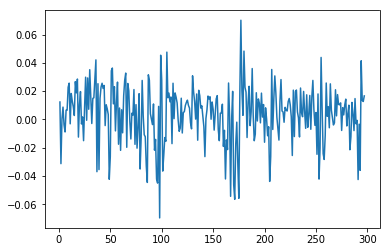

In [7]:
Bal.plot()

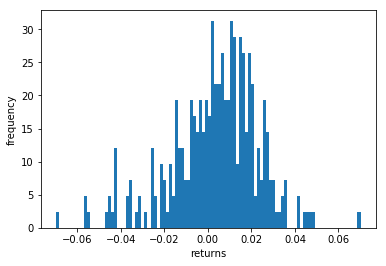

In [8]:
plt.hist(Bal, bins=100, density=True)
plt.xlabel('returns')
plt.ylabel('frequency')
plt.show()

In [16]:
#CumulativeReturns are in this case similar to just printing Adj.close price.
CumulativeReturnsBal = ((1+Bal).cumprod()-1)
CumulativeReturnsFix = ((1+Fix).cumprod()-1)
CumulativeReturnsYie = ((1+Yie).cumprod()-1)
CumulativeReturnsGro = ((1+Gro).cumprod()-1)

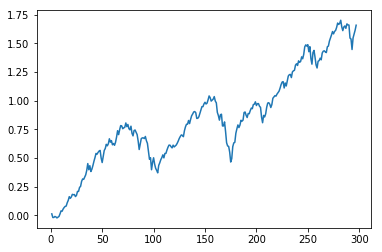

In [17]:
CumulativeReturnsBal.plot()

In [18]:
df = pd.concat([Fixed, Yie, Gro, Bal],axis=1)


In [19]:
df1 = df.dropna()

In [20]:
df1.head()

,Date,Net asset values in currency of account (EUR),FixedRets,YieldRets,GrowthRets,BalancedRets
1,1992-11-30,1003.03,0.003331,0.003622,0.002424,0.012307
2,1992-12-30,1012.22,0.009162,-0.007746,-0.019642,-0.031304
3,1993-01-29,1018.39,0.006096,0.007917,0.004148,0.000442
4,1993-02-26,1054.97,0.035919,0.026226,0.037460,0.008708
5,1993-03-31,1065.53,0.010010,0.008422,0.012160,-0.003844


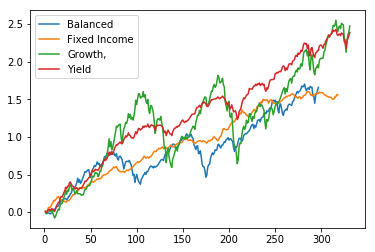

In [97]:
x1 = plt.plot(CumulativeReturnsBal)
x2 = plt.plot(CumulativeReturnsFix)
x3 = plt.plot(CumulativeReturnsGro)
x4 = plt.plot(CumulativeReturnsYie)

plt.gca().legend(('Balanced','Fixed Income','Growth,','Yield' ))
plt.show()




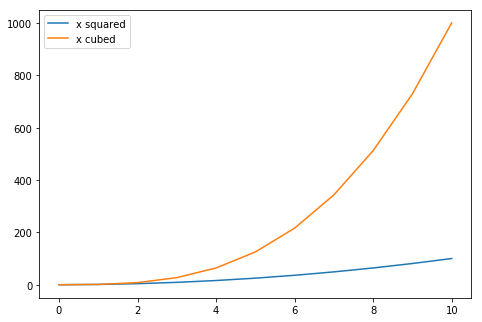

In [95]:
# just example for me how to make labels work.
fig= plt.figure()

axes= fig.add_axes([0,0,1,1])

x= np.arange(0,11)

axes.plot(x,x**2, label='x squared')

axes.plot(x, x**3, label='x cubed')

axes.legend()

plt.show()


In [29]:
CorrelationMatrix = df1.corr()

In [30]:
print(CorrelationMatrix)

                                               Net asset values in currency of account (EUR)  \
Net asset values in currency of account (EUR)                                       1.000000   
FixedRets                                                                          -0.178241   
YieldRets                                                                          -0.152893   
GrowthRets                                                                         -0.065425   
BalancedRets                                                                       -0.046867   

                                               FixedRets  YieldRets  \
Net asset values in currency of account (EUR)  -0.178241  -0.152893   
FixedRets                                       1.000000   0.014308   
YieldRets                                       0.014308   1.000000   
GrowthRets                                      0.039273   0.875652   
BalancedRets                                    0.123626   0.062155 

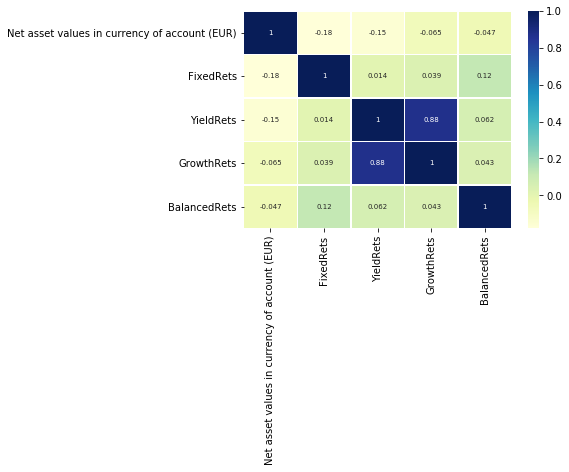

In [32]:
# Create a heatmap
sns.heatmap(CorrelationMatrix,
            annot=True,
            cmap="YlGnBu",
            linewidths=0.4,
            annot_kws={"size": 7})

# Plot aesthetics
plt.xticks(rotation=90)
plt.yticks(rotation=0) 
plt.show()